In [1]:
import pycircos
import warnings
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from os import listdir
from os.path import isdir
from matplotlib.backends.backend_pdf import PdfPages
from PyCircos_Utils import *

warnings.filterwarnings("ignore")

rcParams = {'font.size': 20, 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}

plt.rcParams.update(rcParams)

Garc    = pycircos.Garc
Gcircle = pycircos.Gcircle

osa_len = 2932766
osb_len = 3046682

 

In [3]:
novel_contig_path = '/Users/harihara/Mount-2/hotspring_metagenome/Synechococcus_paper_analysis/\
Ref_Guided_Scaffolding_Clustering_Aug_2022/Missing_Contig_Coords_Aug/'
novel_contigs = {}
samples = listdir(novel_contig_path+'OSA/')
for s in samples:
    df_osa = pd.read_csv(novel_contig_path+'OSA/'+s, sep = "\t")
    df_osa.loc[(df_osa['Start'] < 0), 'Start'] += osa_len
    df_osa.loc[(df_osa['End'] < 0), 'End'] += osa_len
    df_osa_grp = df_osa.sort_values(by = ['Contig','Start']).groupby(['Contig']).apply(Max_Clique_Interval_Graph)
    
    df_osb = pd.read_csv(novel_contig_path+'OSB/'+s, sep = "\t")
    df_osb.loc[(df_osb['Start'] < 0), 'Start'] += osb_len
    df_osb.loc[(df_osb['End'] < 0), 'End'] += osb_len
    df_osb_grp = df_osb.sort_values(by = ['Contig','Start']).groupby(['Contig']).apply(Max_Clique_Interval_Graph)
    
    novel_contigs[s.replace(".txt","")] = {'OSA':df_osa_grp,'OSB':df_osb_grp}

In [5]:
grp_path = '/Users/harihara/Mount-2/hotspring_metagenome/Synechococcus_paper_analysis/\
Ref_Guided_Scaffolding_Clustering_Aug_2022/BLAST_All_vs_All/Containment_Clusters_Filtered_90_75_1000.txt'
df_novel_filtered = pd.read_csv(grp_path, sep = "\t")
d = df_novel_filtered.groupby('GroupID')['Contig'].apply(list).to_dict()
print(len(d))

275


In [6]:
df_osa_only = pd.DataFrame()
df_osb_only = pd.DataFrame()

df_osa_both = pd.DataFrame()
df_osb_both = pd.DataFrame()

for g in d:
    contigs = d[g]
    osa_contig_count, osb_contig_count = 0, 0
    osa_contigs, osb_contigs = [], []
    df_osa, df_osb = pd.DataFrame(), pd.DataFrame()
    
    for c in contigs:
        splits = c.split('_')
        
        if len(splits) == 5:
            sample = splits[0]+'_'+splits[1]
            genome = splits[2].upper()
            contig = splits[3]+'_'+splits[4]
        if len(splits) == 4:
            sample = splits[0]
            genome = splits[1].upper()
            contig = splits[2]+'_'+splits[3]
        if genome == "OSA":
            osa_contig_count += 1
        if genome == "OSB":
            osb_contig_count += 1
        
        try:
            row = novel_contigs[sample][genome].loc[contig]
            row['Group'] = g
            row['Sample'] = sample
            if genome == 'OSA':
                df_osa = df_osa.append(row)
            elif genome == 'OSB':
                df_osb = df_osb.append(row)
            
        except:
            pass
        #    print(g, len(d[g]), sample, genome, contig)
    
    if len(df_osa) > 0:
        df_osa = df_osa.reset_index()
        df_osa = df_osa.rename(columns = {'index':'Contig'})
        idx_osa = df_osa.groupby(['Sample','Contig'])['Start'].transform(min) == df_osa['Start']
        df_osa = df_osa.loc[idx_osa]
    if len(df_osb) > 0:
        df_osb = df_osb.reset_index()
        df_osb = df_osb.rename(columns = {'index':'Contig'})
        idx_osb = df_osb.groupby(['Sample','Contig'])['Start'].transform(min) == df_osb['Start']
        df_osb = df_osb.loc[idx_osb]
    
    if len(df_osa) == 0 and len(df_osb) > 0:
        df_osb_only = df_osb_only.append(df_osb, ignore_index = True)
    
    if len(df_osb) == 0 and len(df_osa) > 0:
        df_osa_only = df_osa_only.append(df_osa, ignore_index = True)
    
    if len(df_osa) > 0 and len(df_osb) > 0:
        df_osb_both = df_osb_both.append(df_osb)
        df_osa_both = df_osa_both.append(df_osa)
    

In [7]:
osa_indicator_both, osb_indicator_both, osa_both_all, osb_both_all = Make_Counts(df_osa_both, df_osb_both, osa_len, osb_len)
osa_indicator_only, osb_indicator_only, osa_only_all, osb_only_all = Make_Counts(df_osa_only, df_osb_only, osa_len, osb_len)

Here 2931406 1360.0
Here 2931484 1282.0


In [8]:
ms_samples = ['HotsprSampleMS50','HotsprSampleMS55','HotsprSampleMS60','HotsprSampleMS65']
os_samples = ['HotsprSampleOS50','HotsprSampleOS55','HotsprSampleOS60','HotsprSampleOS65']
light_samples = ['Hotspr20Samplet1','Hotspr2Sampleme2','Hotspr20SampleT8','Hotspr20SampleT9']
dark_samples = ['Hotspr20Samplem2','Hotspr2Sampleee2', 'Hotspr20SampleP4','Hotspr2SamplePe2']


In [9]:
out_dir = '/Users/harihara/Research-Activities/Plots/Hot_Spring_Plots/Synechococcus-Paper/'
if not isdir(out_dir):
    mkdir(out_dir)

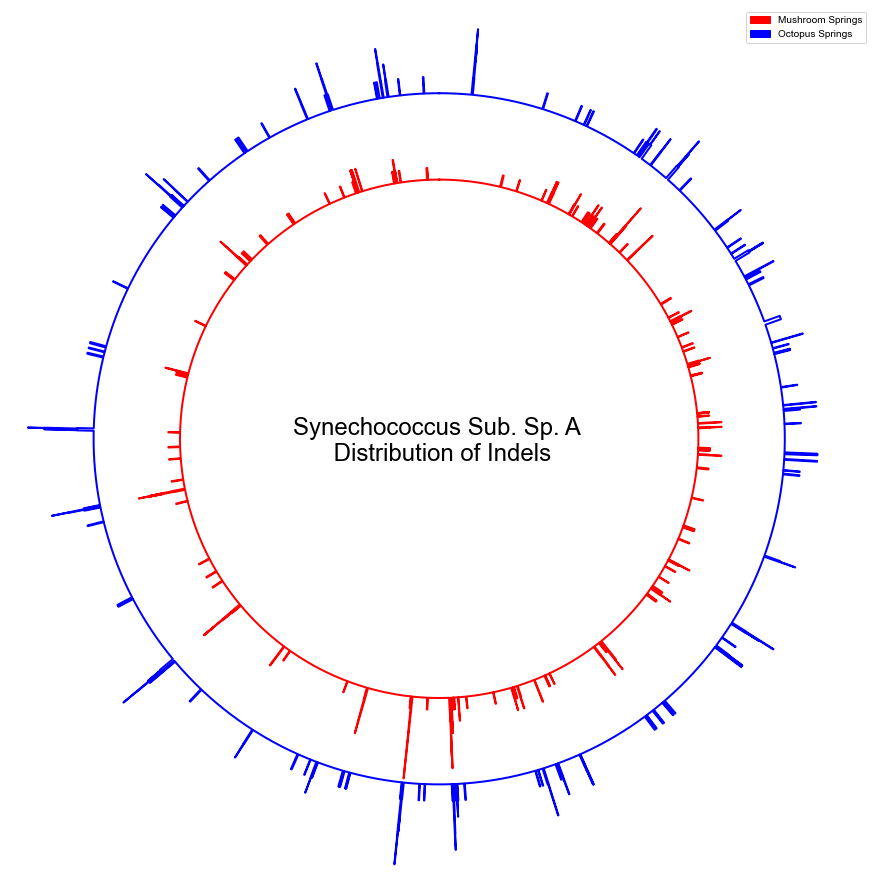

In [10]:
garc = Garc(arc_id="OSA", interspace=0, linewidth=0, facecolor="#FFFFFF00", raxis_range=(0,10), 
            labelsize = 24, label="Synechococcus Sub. Sp. A \n Distribution of Indels", 
            label_visible=True)

gcircle = Gcircle(figsize = (12,12))
gcircle.add_garc(garc)
gcircle.set_garcs()

ms_osa = (osa_indicator_both[ms_samples[0]]+osa_indicator_both[ms_samples[1]]+
          osa_indicator_both[ms_samples[2]]+osa_indicator_both[ms_samples[3]]+
          osa_indicator_only[ms_samples[0]]+osa_indicator_only[ms_samples[1]]+
          osa_indicator_only[ms_samples[2]]+osa_indicator_only[ms_samples[3]])

os_osa = (osa_indicator_both[os_samples[0]]+osa_indicator_both[os_samples[1]]+
          osa_indicator_both[os_samples[2]]+osa_indicator_both[os_samples[3]]+
          osa_indicator_only[os_samples[1]]+osa_indicator_only[os_samples[0]]+
          osa_indicator_only[os_samples[2]]+osa_indicator_only[os_samples[3]])

gcircle.lineplot('OSA',ms_osa,raxis_range=(600,800), linewidth = 2, linecolor = 'red')
gcircle.lineplot('OSA',os_osa,raxis_range=(800,1000), linewidth = 2, linecolor = 'blue')
ax=gcircle.ax
red_patch = mpatches.Patch(color='red', label='Mushroom Springs')
blue_patch = mpatches.Patch(color='blue', label='Octopus Springs')
ax.legend(handles=[red_patch, blue_patch])
fig = ax.get_figure()
fig.tight_layout()
fig.savefig(out_dir+'OSA-All-Indels.pdf')

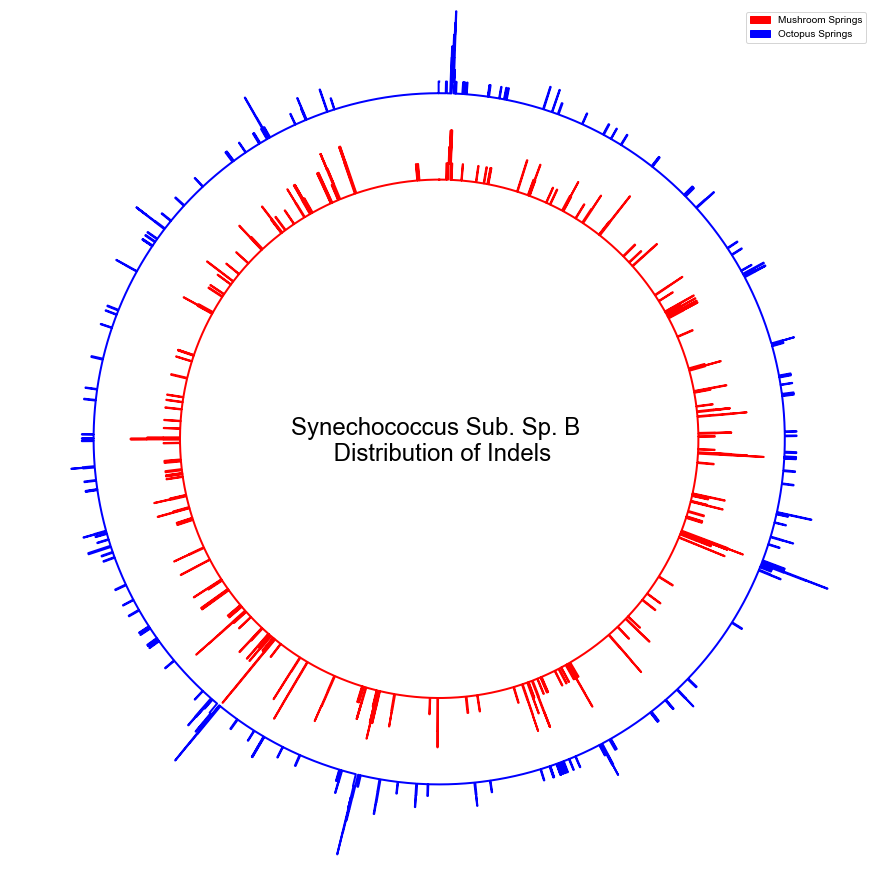

In [11]:
garc = Garc(arc_id="OSB", interspace=0, linewidth=0, facecolor="#FFFFFF00", raxis_range=(0,10), 
            labelsize = 24, label="Synechococcus Sub. Sp. B \n Distribution of Indels", 
            label_visible=True)

gcircle = Gcircle(figsize = (12,12))
gcircle.add_garc(garc)
gcircle.set_garcs()

ms_osa = (osb_indicator_both[ms_samples[0]]+osb_indicator_both[ms_samples[1]]+
          osb_indicator_both[ms_samples[2]]+osb_indicator_both[ms_samples[3]]+
          osb_indicator_only[ms_samples[0]]+osb_indicator_only[ms_samples[1]]+
          osb_indicator_only[ms_samples[2]]+osb_indicator_only[ms_samples[3]])

os_osa = (osb_indicator_both[os_samples[0]]+osb_indicator_both[os_samples[1]]+
          osb_indicator_both[os_samples[2]]+osb_indicator_both[os_samples[3]]+
          osb_indicator_only[os_samples[0]]+osb_indicator_only[os_samples[1]]+
          osb_indicator_only[os_samples[2]]+osb_indicator_only[os_samples[3]])

gcircle.lineplot('OSB',ms_osa,raxis_range=(600,800), linewidth = 2, linecolor = 'red')
gcircle.lineplot('OSB',os_osa,raxis_range=(800,1000), linewidth = 2, linecolor = 'blue')
ax=gcircle.ax
red_patch = mpatches.Patch(color='red', label='Mushroom Springs')
blue_patch = mpatches.Patch(color='blue', label='Octopus Springs')
ax.legend(handles=[red_patch, blue_patch])
fig = ax.get_figure()
fig.tight_layout()
fig.savefig(out_dir+'OSB-All-Indels.pdf')

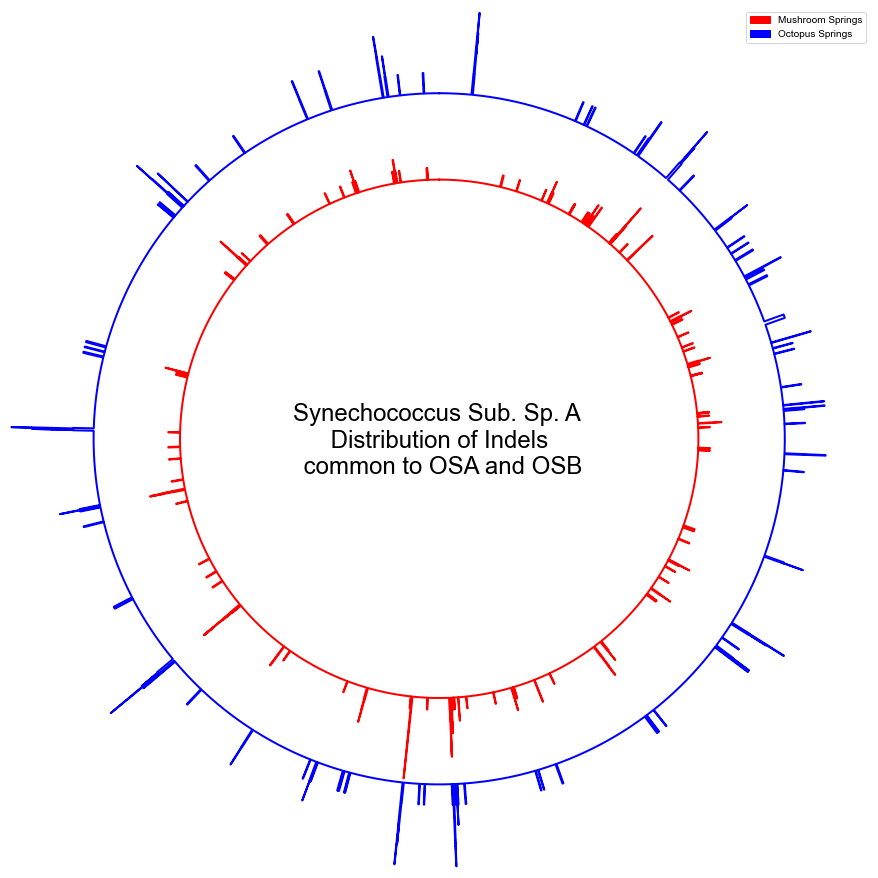

In [12]:
garc = Garc(arc_id="OSA", interspace=0, linewidth=0, facecolor="#FFFFFF00", raxis_range=(0,10), 
            labelsize = 24, label="Synechococcus Sub. Sp. A \n Distribution of Indels \n common to OSA and OSB", 
            label_visible=True)

gcircle = Gcircle(figsize = (12,12))
gcircle.add_garc(garc)
gcircle.set_garcs()

ms_osa_both = (osa_indicator_both[ms_samples[0]]+osa_indicator_both[ms_samples[1]]+
               osa_indicator_both[ms_samples[2]]+osa_indicator_both[ms_samples[3]])
os_osa_both = (osa_indicator_both[os_samples[0]]+osa_indicator_both[os_samples[1]]+
               osa_indicator_both[os_samples[2]]+osa_indicator_both[os_samples[3]])
gcircle.lineplot('OSA',ms_osa_both,raxis_range=(600,800), linewidth = 2, linecolor = 'red')
gcircle.lineplot('OSA',os_osa_both,raxis_range=(800,1000), linewidth = 2, linecolor = 'blue')
ax=gcircle.ax
red_patch = mpatches.Patch(color='red', label='Mushroom Springs')
blue_patch = mpatches.Patch(color='blue', label='Octopus Springs')
ax.legend(handles=[red_patch, blue_patch])
fig = ax.get_figure()
fig.tight_layout()
fig.savefig(out_dir + 'Circos-OSA-Both(Temperature-Gradient-Springs).pdf')

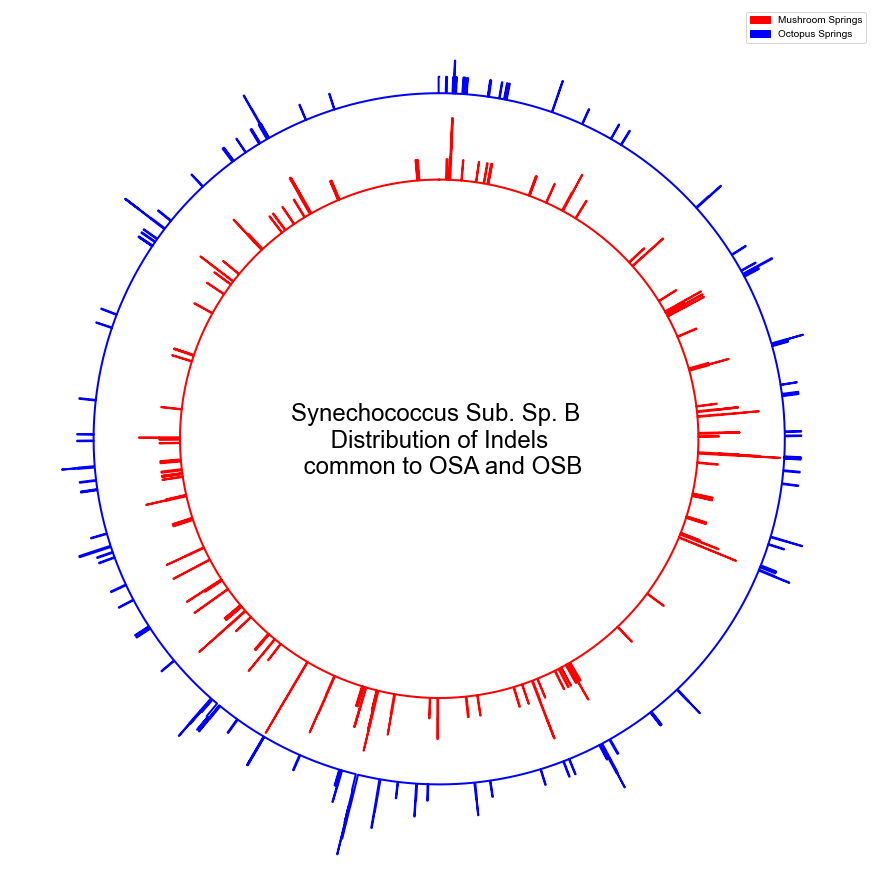

In [13]:
garc = Garc(arc_id="OSB", interspace=0, linewidth=0, facecolor="#FFFFFF00", raxis_range=(0,10), 
            labelsize = 24, label="Synechococcus Sub. Sp. B \n Distribution of Indels \n common to OSA and OSB", 
            label_visible=True)

gcircle = Gcircle(figsize = (12,12))
gcircle.add_garc(garc)
gcircle.set_garcs()

ms_osb_both = (osb_indicator_both[ms_samples[0]]+osb_indicator_both[ms_samples[1]]+
               osb_indicator_both[ms_samples[2]]+osb_indicator_both[ms_samples[3]])
os_osb_both = (osb_indicator_both[os_samples[0]]+osb_indicator_both[os_samples[1]]+
               osb_indicator_both[os_samples[2]]+osb_indicator_both[os_samples[3]])
gcircle.lineplot('OSB',ms_osb_both,raxis_range=(600,800), linewidth = 2, linecolor = 'red')
gcircle.lineplot('OSB',os_osb_both,raxis_range=(800,1000), linewidth = 2, linecolor = 'blue')
ax=gcircle.ax
red_patch = mpatches.Patch(color='red', label='Mushroom Springs')
blue_patch = mpatches.Patch(color='blue', label='Octopus Springs')
ax.legend(handles=[red_patch, blue_patch])
fig = ax.get_figure()
fig.tight_layout()
fig.savefig(out_dir + 'Circos-OSB-Both(Temperature-Gradient-Springs).pdf')

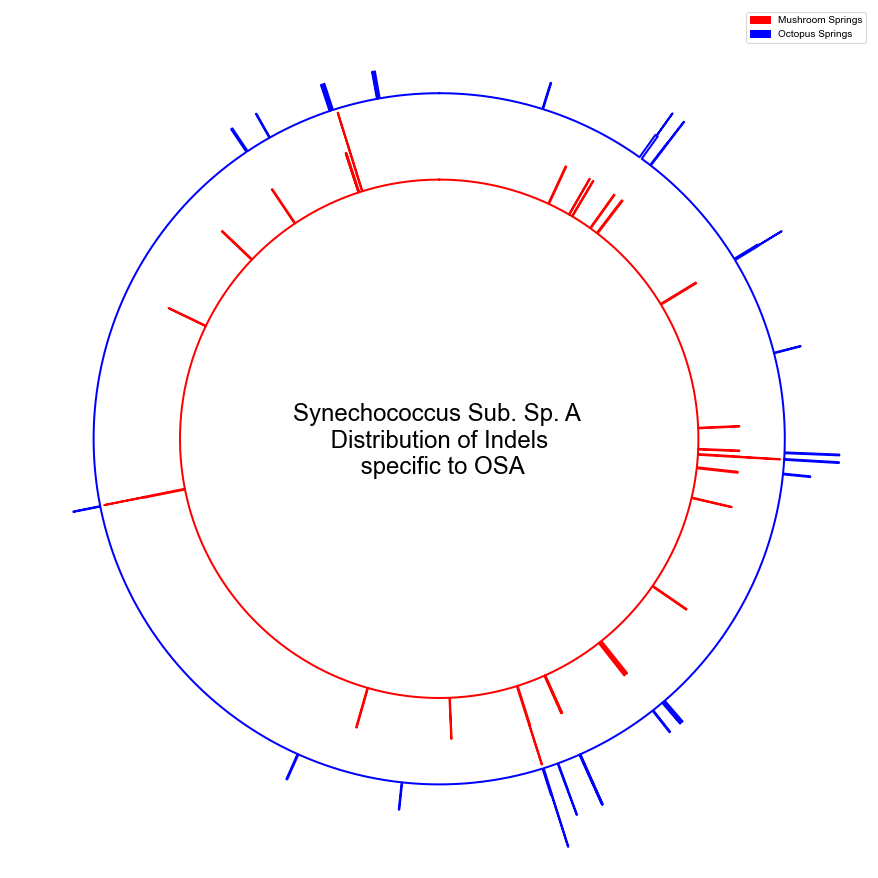

In [14]:
garc = Garc(arc_id="OSA", interspace=0, linewidth=0, facecolor="#FFFFFF00", raxis_range=(0,10), 
            labelsize = 24, label="Synechococcus Sub. Sp. A \n Distribution of Indels \n specific to OSA", 
            label_visible=True)

gcircle = Gcircle(figsize = (12,12))
gcircle.add_garc(garc)
gcircle.set_garcs()

ms_osa_both = (osa_indicator_only[ms_samples[0]]+osa_indicator_only[ms_samples[1]]+
               osa_indicator_only[ms_samples[2]]+osa_indicator_only[ms_samples[3]])
os_osa_both = (osa_indicator_only[os_samples[1]]+
               osa_indicator_only[os_samples[2]]+osa_indicator_only[os_samples[3]])
gcircle.lineplot('OSA',ms_osa_both,raxis_range=(600,800), linewidth = 2, linecolor = 'red')
gcircle.lineplot('OSA',os_osa_both,raxis_range=(800,1000), linewidth = 2, linecolor = 'blue')
ax=gcircle.ax
red_patch = mpatches.Patch(color='red', label='Mushroom Springs')
blue_patch = mpatches.Patch(color='blue', label='Octopus Springs')
ax.legend(handles=[red_patch, blue_patch])
fig = ax.get_figure()
fig.tight_layout()

fig.savefig(out_dir + 'Circos-OSA-Only(Temperature-Gradient-Springs).pdf')

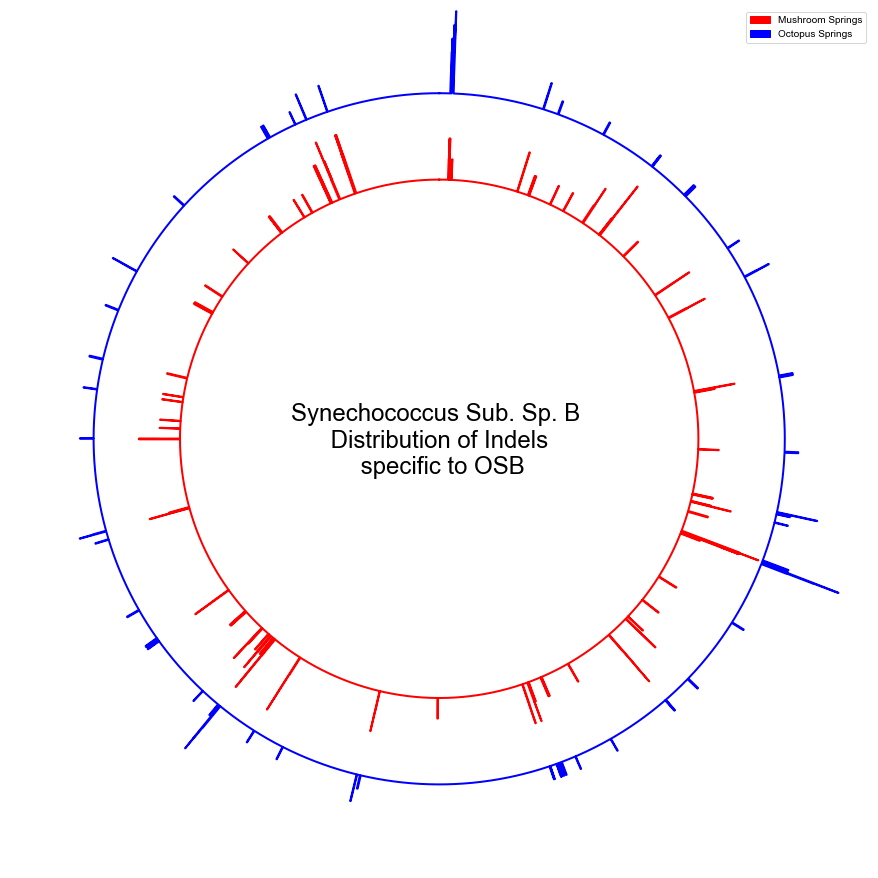

In [15]:
garc = Garc(arc_id="OSB", interspace=0, linewidth=0, facecolor="#FFFFFF00", raxis_range=(0,10), 
            labelsize = 24, label="Synechococcus Sub. Sp. B \n Distribution of Indels \n specific to OSB", 
            label_visible=True)

gcircle = Gcircle(figsize = (12,12))
gcircle.add_garc(garc)
gcircle.set_garcs()

ms_osb_only = (osb_indicator_only[ms_samples[0]]+osb_indicator_only[ms_samples[1]]+
               osb_indicator_only[ms_samples[2]]+osb_indicator_only[ms_samples[3]])
os_osb_only = (osb_indicator_only[os_samples[0]]+osb_indicator_only[os_samples[1]]+
               osb_indicator_only[os_samples[2]]+osb_indicator_only[os_samples[3]])
gcircle.lineplot('OSB',ms_osb_only,raxis_range=(600,800), linewidth = 2, linecolor = 'red')
gcircle.lineplot('OSB',os_osb_only,raxis_range=(800,1000), linewidth = 2, linecolor = 'blue')
ax=gcircle.ax
red_patch = mpatches.Patch(color='red', label='Mushroom Springs')
blue_patch = mpatches.Patch(color='blue', label='Octopus Springs')
ax.legend(handles=[red_patch, blue_patch])
fig = ax.get_figure()
fig.tight_layout()

fig.savefig(out_dir + 'Circos-OSB-Only(Temperature-Gradient-Springs).pdf')

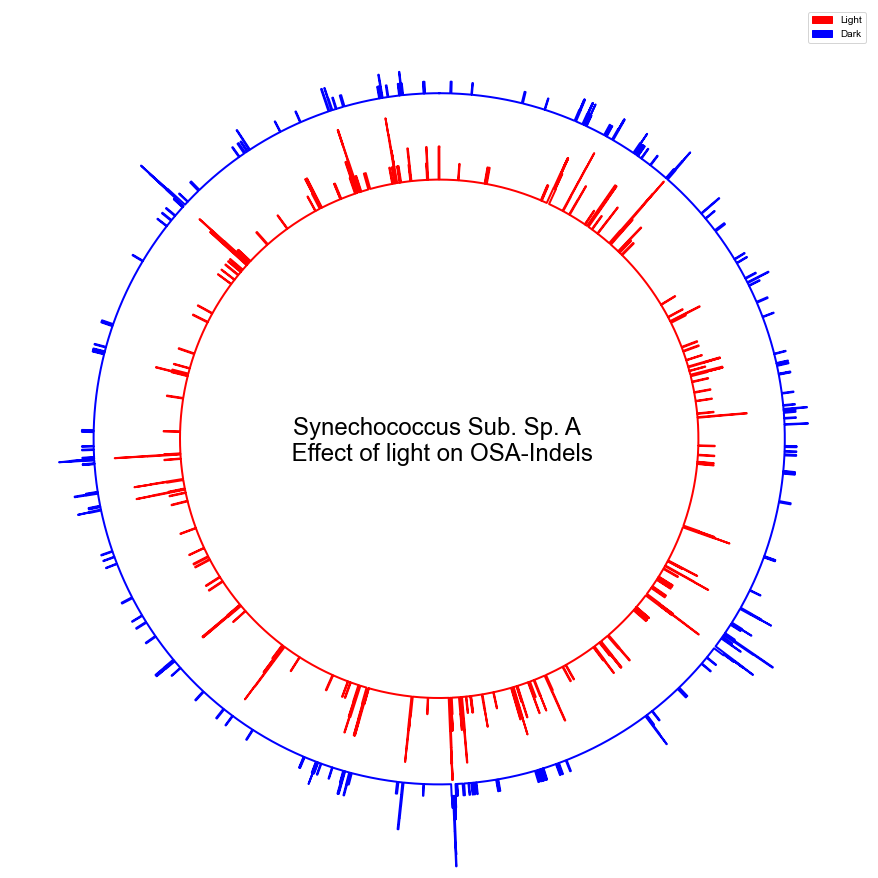

In [16]:
garc = Garc(arc_id="OSA", interspace=0, linewidth=0, facecolor="#FFFFFF00", raxis_range=(0,10), 
            labelsize = 24, label="Synechococcus Sub. Sp. A \n Effect of light on OSA-Indels", 
            label_visible=True)

gcircle = Gcircle(figsize = (12,12))
gcircle.add_garc(garc)
gcircle.set_garcs()

ms_osa_light = (osa_indicator_both[light_samples[0]]+osa_indicator_both[light_samples[1]]+
                osa_indicator_both[light_samples[2]]+osa_indicator_both[light_samples[3]]+
                osa_indicator_only[light_samples[0]]+osa_indicator_only[light_samples[1]]+
                osa_indicator_only[light_samples[2]]+osa_indicator_only[light_samples[3]]) 
ms_osa_dark = (osa_indicator_both[dark_samples[0]]+osa_indicator_both[dark_samples[1]]+
               osa_indicator_both[dark_samples[2]]+osa_indicator_both[dark_samples[3]]+
               osa_indicator_only[dark_samples[1]]+
               osa_indicator_only[dark_samples[2]]+osa_indicator_only[dark_samples[3]])
            
gcircle.lineplot('OSA',ms_osa_light,raxis_range=(600,800), linewidth = 2, linecolor = 'red')
gcircle.lineplot('OSA',ms_osa_dark,raxis_range=(800,1000), linewidth = 2, linecolor = 'blue')
ax=gcircle.ax
red_patch = mpatches.Patch(color='red', label='Light')
blue_patch = mpatches.Patch(color='blue', label='Dark')
ax.legend(handles=[red_patch, blue_patch])
fig = ax.get_figure()
fig.tight_layout()
fig.savefig(out_dir + 'Circos-OSA-Both(Photo-Systems).pdf')

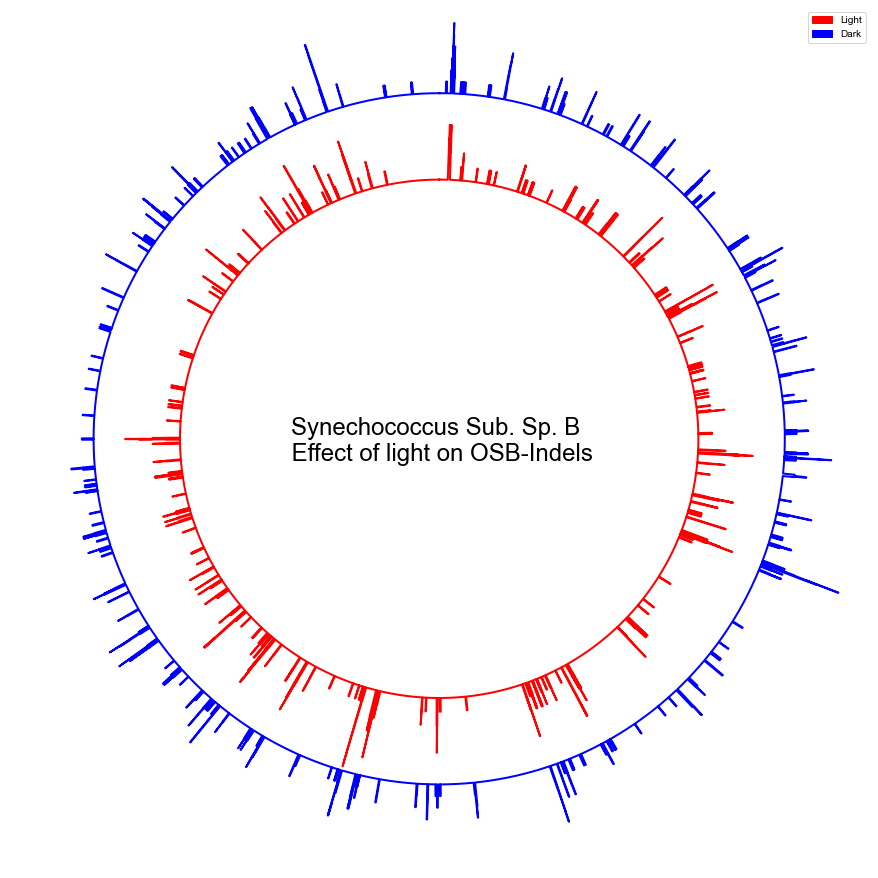

In [17]:
garc = Garc(arc_id="OSB", interspace=0, linewidth=0, facecolor="#FFFFFF00", raxis_range=(0,10), 
            labelsize = 24, label="Synechococcus Sub. Sp. B \n Effect of light on OSB-Indels", 
            label_visible=True)

gcircle = Gcircle(figsize = (12,12))
gcircle.add_garc(garc)
gcircle.set_garcs()

ms_osb_light = (osb_indicator_both[light_samples[0]]+osb_indicator_both[light_samples[1]]+
                osb_indicator_both[light_samples[2]]+osb_indicator_both[light_samples[3]]+
                osb_indicator_only[light_samples[0]]+osb_indicator_only[light_samples[1]]+
                osb_indicator_only[light_samples[2]]+osb_indicator_only[light_samples[3]]) 
ms_osb_dark = (osb_indicator_both[dark_samples[0]]+osb_indicator_both[dark_samples[1]]+
               osb_indicator_both[dark_samples[2]]+osb_indicator_both[dark_samples[3]]+
               osb_indicator_only[dark_samples[0]]+osb_indicator_only[dark_samples[1]]+
               osb_indicator_only[dark_samples[2]]+osb_indicator_only[dark_samples[3]])
            
gcircle.lineplot('OSB',ms_osb_light,raxis_range=(600,800), linewidth = 2, linecolor = 'red')
gcircle.lineplot('OSB',ms_osb_dark,raxis_range=(800,1000), linewidth = 2, linecolor = 'blue')
ax=gcircle.ax
red_patch = mpatches.Patch(color='red', label='Light')
blue_patch = mpatches.Patch(color='blue', label='Dark')
ax.legend(handles=[red_patch, blue_patch])
fig = ax.get_figure()
fig.tight_layout()
fig.savefig(out_dir + 'Circos-OSB-Both(Photo-Systems).pdf')